# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [1]:
# If on colab, uncomment the following lines

!wget https://raw.githubusercontent.com/girafe-ai/ml-mipt/21f_basic/homeworks_basic/Lab1_ML_pipeline_and_SVM/car_data.csv

--2021-11-08 16:49:34--  https://raw.githubusercontent.com/girafe-ai/ml-mipt/21f_basic/homeworks_basic/Lab1_ML_pipeline_and_SVM/car_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58374 (57K) [text/plain]
Saving to: ‘car_data.csv.1’

car_data.csv.1      100%[===================>]  57.01K  --.-KB/s    in 0.001s  

2021-11-08 16:49:34 (43.8 MB/s) - ‘car_data.csv.1’ saved [58374/58374]



In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [3]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,266,86,42,65,116,53,6,152,45,19,141,175,335,172,85,5,4,179,183
1,327,89,44,82,136,54,6,149,45,19,144,170,332,168,68,10,14,188,193
2,546,92,40,66,111,48,7,139,50,19,140,159,277,148,85,12,19,182,183
3,78,104,52,94,208,66,5,208,31,24,161,227,666,218,76,11,4,193,191
4,332,99,57,109,220,66,11,221,30,25,176,234,725,236,70,10,25,188,200
5,150,104,50,96,211,65,10,187,35,22,156,207,527,195,65,3,7,195,206
6,841,93,39,87,183,64,8,169,40,20,134,200,422,149,72,7,25,188,195
7,695,92,41,66,125,52,7,139,50,18,143,160,275,161,81,7,19,182,184
8,640,91,52,98,196,62,9,193,34,22,161,216,562,244,69,3,1,190,199
9,243,101,55,108,228,69,12,215,31,24,168,229,684,214,71,2,16,188,199


Methods `describe` and `info` deliver some useful information.

In [4]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.00000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,438.397086,93.646630,44.730419,81.599271,167.575592,61.296903,8.391621,168.001821,41.19490,20.510018,147.488160,187.805100,436.207650,174.156648,72.522769,6.298725,12.116576,188.901639,195.451730
std,242.003942,8.150438,6.232143,16.107182,33.458388,7.368383,4.204360,33.610288,8.00754,2.609358,14.519756,31.795943,178.039241,33.168628,7.722014,4.848246,8.951872,6.219919,7.599939
min,1.000000,73.000000,33.000000,40.000000,104.000000,47.000000,2.000000,112.000000,26.00000,17.000000,118.000000,130.000000,184.000000,109.000000,61.000000,0.000000,0.000000,176.000000,181.000000
25%,232.000000,87.000000,40.000000,69.000000,139.000000,57.000000,7.000000,145.000000,33.00000,19.000000,136.000000,166.000000,314.000000,148.000000,67.000000,2.000000,5.000000,185.000000,190.000000
50%,446.000000,93.000000,44.000000,79.000000,165.000000,61.000000,8.000000,155.000000,43.00000,19.000000,145.000000,177.000000,359.000000,173.000000,72.000000,6.000000,11.000000,188.000000,197.000000
75%,645.000000,100.000000,50.000000,98.000000,195.000000,65.000000,10.000000,198.000000,46.00000,23.000000,159.000000,217.000000,589.000000,197.000000,76.000000,9.000000,18.000000,193.000000,201.000000
max,845.000000,117.000000,58.000000,112.000000,333.000000,138.000000,52.000000,265.000000,61.00000,29.000000,188.000000,320.000000,1018.000000,268.000000,135.000000,22.000000,40.000000,206.000000,211.000000


In [5]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int64
 1   1       549 non-null    int64
 2   2       549 non-null    int64
 3   3       549 non-null    int64
 4   4       549 non-null    int64
 5   5       549 non-null    int64
 6   6       549 non-null    int64
 7   7       549 non-null    int64
 8   8       549 non-null    int64
 9   9       549 non-null    int64
 10  10      549 non-null    int64
 11  11      549 non-null    int64
 12  12      549 non-null    int64
 13  13      549 non-null    int64
 14  14      549 non-null    int64
 15  15      549 non-null    int64
 16  16      549 non-null    int64
 17  17      549 non-null    int64
 18  18      549 non-null    int64
dtypes: int64(19)
memory usage: 81.6 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

Проверяю, есть ли NANs в датасете, чтобы убрать или заменить их, если есть


In [6]:
### YOUR CODE HERE
np.isnan(X_train).any()

False

Визуализирую распределения признаков, чтобы посмотреть, есть ли какие-то явные зависимости между ними

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9ff41f4910>,
      dtype=object)

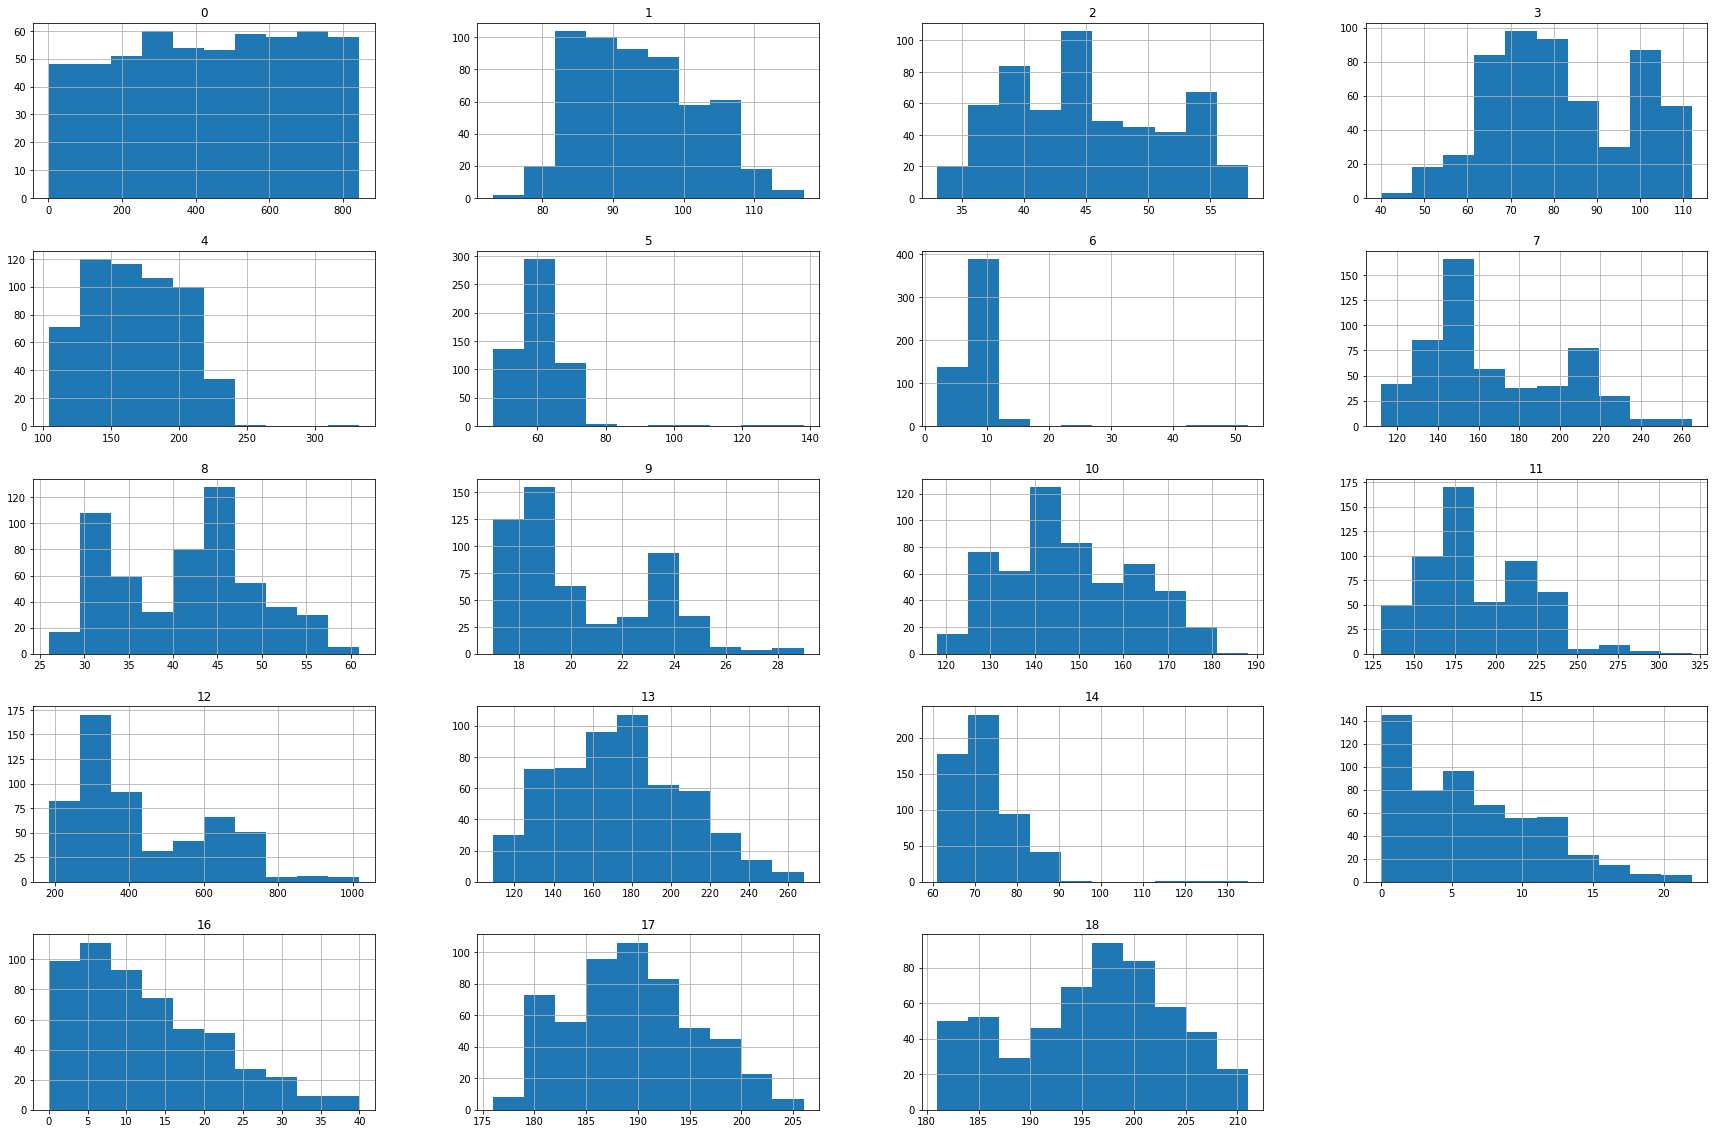

In [7]:
cols = X_train_pd.columns
X_train_pd[cols].hist(figsize=(30,20))

In [8]:
X_train_pd.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,1.00,0.08,0.04,0.05,0.02,-0.06,-0.03,0.05,-0.03,0.05,0.04,0.02,0.05,0.03,-0.07,0.03,0.03,0.01,0.02
1,0.08,1.00,0.70,0.80,0.72,0.14,0.19,0.81,-0.79,0.81,0.69,0.77,0.82,0.59,-0.26,0.23,0.16,0.30,0.37
2,0.04,0.70,1.00,0.81,0.65,0.18,0.27,0.87,-0.84,0.86,0.97,0.82,0.86,0.94,0.05,0.17,-0.01,-0.10,0.05
3,0.05,0.80,0.81,1.00,0.80,0.20,0.29,0.91,-0.92,0.90,0.79,0.87,0.90,0.73,-0.24,0.09,0.25,0.15,0.34
4,0.02,0.72,0.65,0.80,1.00,0.66,0.42,0.77,-0.82,0.74,0.59,0.82,0.76,0.58,-0.21,0.05,0.19,0.39,0.48
5,-0.06,0.14,0.18,0.20,0.66,1.00,0.62,0.16,-0.24,0.13,0.14,0.32,0.15,0.16,0.13,-0.06,-0.02,0.26,0.29
6,-0.03,0.19,0.27,0.29,0.42,0.62,1.00,0.20,-0.22,0.20,0.32,0.35,0.18,0.22,0.29,0.04,0.03,-0.02,0.15
7,0.05,0.81,0.87,0.91,0.77,0.16,0.20,1.00,-0.97,0.99,0.82,0.95,1.00,0.81,-0.04,0.08,0.20,0.01,0.13
8,-0.03,-0.79,-0.84,-0.92,-0.82,-0.24,-0.22,-0.97,1.00,-0.95,-0.79,-0.94,-0.96,-0.78,0.11,-0.06,-0.17,-0.11,-0.22
9,0.05,0.81,0.86,0.90,0.74,0.13,0.20,0.99,-0.95,1.00,0.83,0.94,0.99,0.81,-0.02,0.09,0.19,-0.02,0.11


По матрице корреляции видно, что признаки 2 и 10, 7 и 9 и 12 имеют корреляции близкие к 1(>=0.95), что указывает на практически линейную зависимость между ними, что критично для линейной регрессии. Т.к. в задании я все равно буду применять PCA, я пока не стала убирать избыточные признаки(10, 9, 12), но можно было бы это сделать как предобработку данных следующим образом:

In [9]:
print([i for i in range(9)] + [11] + [i for i in range(13, 19)])

[0, 1, 2, 3, 4, 5, 6, 7, 8, 11, 13, 14, 15, 16, 17, 18]


In [26]:
new_columns = [i for i in range(9)] + [11] + [i for i in range(13, 19)]
X_train_new = X_train[:,new_columns]
X_test_new = X_test[:, new_columns]
print(X_train_new.shape)

(549, 16)


#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

Нормировку и саму модель объединяю в pipeline, чтобы избежать утечки данных при кросс-валидации

In [10]:
### YOUR CODE HERE

scaler = StandardScaler()
model = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500)
pipeline = make_pipeline(scaler, model)

param_grid = {'logisticregression__C': [10, 100, 1000]}
grid = GridSearchCV(pipeline, param_grid, cv=5, error_score=0)
grid.fit(X_train, y_train)
print("Best CV_accuracy=", grid.best_score_)
print("Best parameters=", grid.best_params_)

Best CV_accuracy= 0.7959966638865722
Best parameters= {'logisticregression__C': 1000}


In [11]:
from sklearn.metrics import f1_score, accuracy_score
y_pred_tr = grid.predict(X_train)
pred_proba_tr = grid.predict_proba(X_train)
print("Train accuracy = ", accuracy_score(y_train, y_pred_tr))
print("Train F1_score = ", f1_score(y_train, y_pred_tr, average='weighted')) 

y_pred = grid.predict(X_test)
pred_proba = grid.predict_proba(X_test)
print("Test accuracy = ", accuracy_score(y_test, y_pred))
print("Test F1_score = ", f1_score(y_test, y_pred, average='weighted')) 

Train accuracy =  0.8324225865209471
Train F1_score =  0.8302910571964867
Test accuracy =  0.8249158249158249
Test F1_score =  0.823691344983211


In [12]:
# You might use this command to install scikit-plot. 
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding 
# virtual environment instead
! pip install scikit-plot

In [13]:
from scikitplot.metrics import plot_roc

Roc-кривые для тренировочной выборки

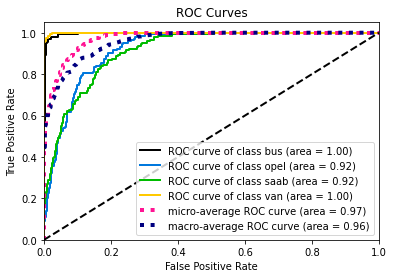

In [14]:
plot_roc(y_train, pred_proba_tr)

Roc-кривые для тестовой выборки

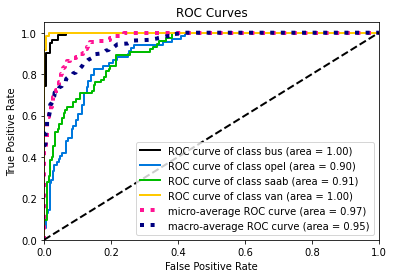

In [15]:
plot_roc(y_test, pred_proba)

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

Нормирую данные перед PCA

In [16]:
from sklearn.decomposition import PCA

In [23]:
### YOUR CODE HERE
pca = PCA()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
pca.fit(X_train_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

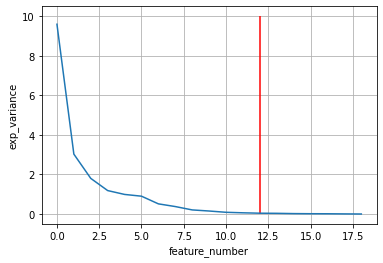

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
columns = np.arange(19)
plt.plot(columns, pca.explained_variance_)
plt.xlabel("feature_number")
plt.ylabel("exp_variance")
plt.vlines(x=12, ymin=0, ymax=10, colors="red")
plt.grid()
plt.show()

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

По графику определила, что можно спроецировать данные на n = 12 главных компонент, т.к. остальные компоненты вносят практически нулевой вклад-> потеря информации минимальна. Перед PCA нужно нормировать данные, нормировку и PCA объединяю в pipeline, чтобы избежать утечки данных при кросс-валидации. После PCA в теории тоже нужно нормировать, тк поворот системы координат разрушает первоначальную нормировку, но на практике это показало худшее качество - не делаю

In [42]:
### YOUR CODE HERE
pca = PCA(n_components=12)
pipeline = make_pipeline(scaler, pca, model)

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

Обучила 2 модели: первая использует Pipeline из нормировки, выбора главных компонент и лог регресии, вторая - лог регрессия на полностью предобработанном датасете. Несмотря на то, что для второй модели происходит утечка данных при кросс-валидации, а для первой - нет, вторая модель обучилась лучше.

In [20]:
### YOUR CODE HERE
param_grid = {'logisticregression__C': [1e-2, 1e-1, 1, 10, 50, 100, 500, 1e3, 1e6]}
grid = GridSearchCV(pipeline, param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best CV_accuracy=", grid.best_score_)
print("Best parameters=", grid.best_params_)

Best CV_accuracy= 0.7303419516263554
Best parameters= {'logisticregression__C': 50}


Test accuracy =  0.7373737373737373
Test F1_score =  0.7376337005570516


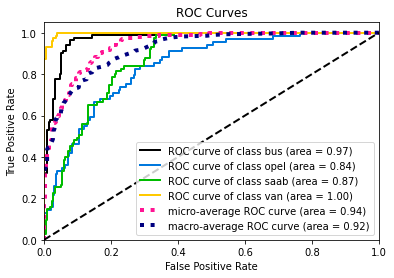

In [21]:
y_pred = grid.predict(X_test)
pred_proba = grid.predict_proba(X_test)
print("Test accuracy = ", accuracy_score(y_test, y_pred))
print("Test F1_score = ", f1_score(y_test, y_pred, average='weighted')) 
plot_roc(y_test, pred_proba)

In [24]:
param_grid = {'C': [1e-2, 1e-1, 1, 10, 50, 100, 500, 1e3, 1e6]}
grid = GridSearchCV(model, param_grid, cv=5)
grid.fit(pca.transform(X_train_scaled), y_train)

print("Best CV_accuracy=", grid.best_score_)
print("Best parameters=", grid.best_params_)

Best CV_accuracy= 0.7959799833194328
Best parameters= {'C': 10}


Train accuracy =  0.8269581056466302
Train F1_score =  0.825114881792449


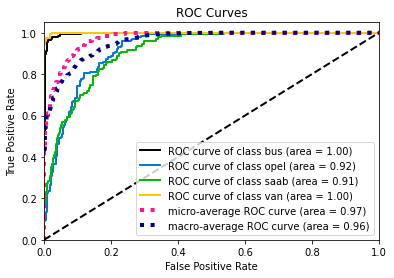

In [25]:
y_pred_tr = grid.predict(pca.transform(X_train_scaled))
pred_proba_tr = grid.predict_proba(pca.transform(X_train_scaled))
print("Train accuracy = ", accuracy_score(y_train, y_pred_tr))
print("Train F1_score = ", f1_score(y_train, y_pred_tr, average='weighted')) 
plot_roc(y_train, pred_proba_tr)

Test accuracy =  0.8282828282828283
Test F1_score =  0.8276741107874537


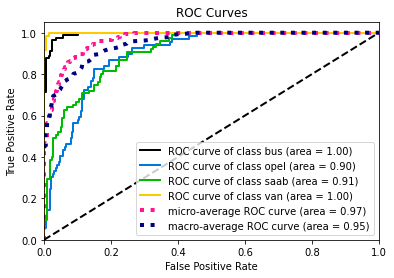

In [26]:
y_pred = grid.predict(pca.transform(X_test_scaled))
pred_proba = grid.predict_proba(pca.transform(X_test_scaled))
print("Test accuracy = ", accuracy_score(y_test, y_pred))
print("Test F1_score = ", f1_score(y_test, y_pred, average='weighted')) 
plot_roc(y_test, pred_proba)

Качество классификации модели незначительно изменилось по сравнению с лог.регрессией, использующей все компоненты

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [29]:
# YOUR CODE HERE
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)
pipeline = make_pipeline(scaler, pca, model)

param_grid = {"decisiontreeclassifier__max_depth": [1, 3, 5, 15, 10],
              "decisiontreeclassifier__criterion": ["gini", "entropy"],
              "decisiontreeclassifier__min_samples_leaf": [1, 3, 5, 10], 
              "decisiontreeclassifier__min_samples_split": [2, 3, 4, 5, 10],
              "decisiontreeclassifier__min_weight_fraction_leaf": [0.0, 0.1, 0.2]}
grid = GridSearchCV(pipeline, param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best CV_accuracy=", grid.best_score_)
print("Best parameters=", grid.best_params_)

Best CV_accuracy= 0.6629524603836531
Best parameters= {'decisiontreeclassifier__criterion': 'gini', 'decisiontreeclassifier__max_depth': 5, 'decisiontreeclassifier__min_samples_leaf': 1, 'decisiontreeclassifier__min_samples_split': 5, 'decisiontreeclassifier__min_weight_fraction_leaf': 0.0}


Train accuracy =  0.7577413479052824
Train F1_score =  0.7457410548703435


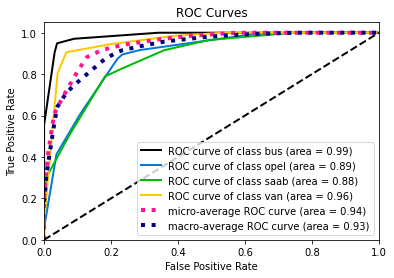

In [30]:
y_pred_tr = grid.predict(X_train)
pred_proba_tr = grid.predict_proba(X_train)
print("Train accuracy = ", accuracy_score(y_train, y_pred_tr))
print("Train F1_score = ", f1_score(y_train, y_pred_tr, average='weighted')) 
plot_roc(y_train, pred_proba_tr)

Test accuracy =  0.6734006734006734
Test F1_score =  0.6697976434713393


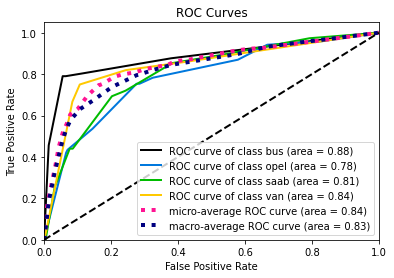

In [31]:
y_pred = grid.predict(X_test)
pred_proba = grid.predict_proba(X_test)
print("Test accuracy = ", accuracy_score(y_test, y_pred))
print("Test F1_score = ", f1_score(y_test, y_pred, average='weighted')) 
plot_roc(y_test, pred_proba)

Оптимальная глубина дерева  5, качество классификации ниже, чем у линейной регрессии, переобучение есть, но оно не слишком большое

#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

Ансамбль лин регрессий

In [32]:
from sklearn.ensemble import BaggingClassifier

In [ ]:
#bagging clasifier
lr_f1_scores = []
lr_acc_scores = []
n_models = np.arange(2, 100, 5)

lin_reg_model = LogisticRegression(C=50, multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500)
lr_pipeline = make_pipeline(scaler, pca, lin_reg_model)

for k in n_models:
    clf = BaggingClassifier(lr_pipeline, n_estimators=k)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    lr_acc_scores.append(accuracy_score(y_test, y_pred))
    lr_f1_scores.append(f1_score(y_test, y_pred, average="weighted"))


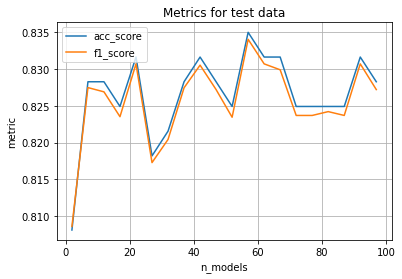

In [36]:
plt.plot(n_models, lr_acc_scores)
plt.plot(n_models, lr_f1_scores)
plt.xlabel("n_models")
plt.ylabel("metric")
plt.legend(["acc_score", "f1_score"], loc="upper left")
plt.title("Metrics for test data")
plt.grid()
plt.show()

Ансабль линейных моделей не дает профит(разница в метрике составляет 0.02, и это не кажется закономерностью, а больше шумом) - при усреднении линейных моделей получается линейная модель, при этом кол-во моделей не принципиально

Ансамбль деревьев

max_depth = 5 (оптимальный параметр для одного дерева)

In [37]:
tree_f1_scores = []
tree_acc_scores = []
n_models = np.arange(2, 100, 5)

tree_model = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_leaf=1, min_samples_split=3, min_weight_fraction_leaf=0.0, random_state=42)
tm_pipeline = make_pipeline(scaler, pca, tree_model)

for k in n_models:
    clf = BaggingClassifier(tm_pipeline, n_estimators=k)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    tree_acc_scores.append(accuracy_score(y_test, y_pred))
    tree_f1_scores.append(f1_score(y_test, y_pred, average="weighted"))

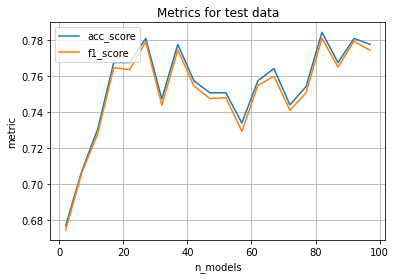

In [38]:
plt.plot(n_models, tree_acc_scores)
plt.plot(n_models, tree_f1_scores)
plt.xlabel("n_models")
plt.ylabel("metric")
plt.legend(["acc_score", "f1_score"], loc="upper left")
plt.title("Metrics for test data")
plt.grid()
plt.show()

max_depth = 15

In [207]:
tree_f1_scores = []
tree_acc_scores = []
n_models = np.arange(2, 100, 5)

tree_model = DecisionTreeClassifier(criterion='gini', max_depth=15, min_samples_leaf=1, min_samples_split=3, min_weight_fraction_leaf=0.0, random_state=42)
tm_pipeline = make_pipeline(scaler, pca, tree_model)

for k in n_models:
    clf = BaggingClassifier(tm_pipeline, n_estimators=k)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    tree_acc_scores.append(accuracy_score(y_test, y_pred))
    tree_f1_scores.append(f1_score(y_test, y_pred, average="weighted"))

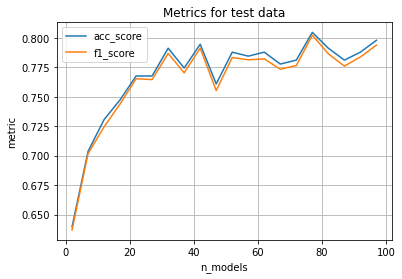

In [208]:
plt.plot(n_models, tree_acc_scores)
plt.plot(n_models, tree_f1_scores)
plt.xlabel("n_models")
plt.ylabel("metric")
plt.legend(["acc_score", "f1_score"], loc="upper left")
plt.title("Metrics for test data")
plt.grid()
plt.show()

Ансамблирование деревьев дает прирост в качестве классификации, причем оптимальные параметры деревьев могут отличаться от подобранного для одного дерева, ведь нужно получить максимально разные алгоритмы - деревья должны быть переобученными, а при подборе оптимальных гиперпараметров для дерева как самостоятельного классификатора важна точность на тесте. Так и получилось: лучше обучился ансамбль из более глубоких деревьев, в этом случае оптимальное кол-во алгоритмов около 75(по графику)

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

In [ ]:
pca.fit(X_train_scaled)

In [47]:
from sklearn.ensemble import RandomForestClassifier
test_acc = []
test_f1_score = []
n_models = np.arange(2, 100, 5)
for cur_number in n_models:
    rfc = RandomForestClassifier(criterion='gini', max_depth=15, n_estimators=cur_number, random_state=42, n_jobs=-1)
    rfc.fit(pca.transform(X_train_scaled), y_train)
    y_pred = rfc.predict(pca.transform(X_test_scaled))
    test_acc.append(accuracy_score(y_test, y_pred))
    test_f1_score.append(f1_score(y_test, y_pred, average='weighted'))

# YOUR CODE HERE

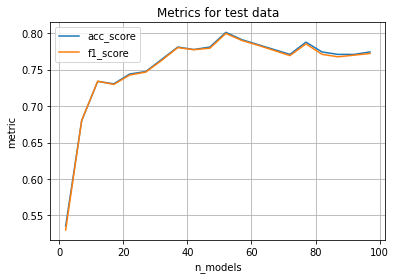

In [48]:
plt.plot(n_models, test_acc)
plt.plot(n_models, test_f1_score)
plt.xlabel("n_models")
plt.ylabel("metric")
plt.legend(["acc_score", "f1_score"], loc="upper left")
plt.title("Metrics for test data")
plt.grid()
plt.show()

Оптимальное значение количества деревьев около 52-53, это меньше, чем в предыдущем пункте - 75, хотя на этом значении тоже пик метрики. Рандомный лес использует выборку и объектов, и признаков, в отличие от бэггинга, поэтому оптимальное кол-во моделей в подходах может отличаться - сами алгоритмы получаются еще более различными и их требуется меньше для получения ответа при усреднении + гиперпараметры и использование PCA не в пайплайне влияют на метрику.

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

In [141]:
test_acc = []
test_f1_score = []
coef = 54 # размер 1 части
n_samples = [coef*i for i in range(1,11)]

ind = np.random.permutation(len(X_train))
lin_reg_model = LogisticRegression(C=50, multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500)
lr_pipeline = make_pipeline(scaler, pca, lin_reg_model)

for i in range(0, 10):
    if i < 9:
        samples_id = ind[:(i+1)*coef]
    else:
        samples_id = ind
    lr_pipeline.fit(X_train[samples_id], y_train[samples_id])
    y_pred = lr_pipeline.predict(X_test)
    test_acc.append(accuracy_score(y_test, y_pred))
    test_f1_score.append(f1_score(y_test, y_pred, average='weighted'))

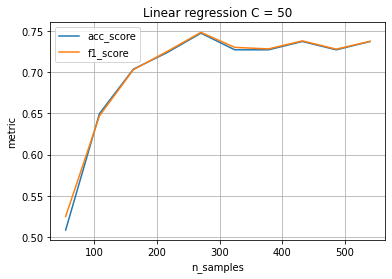

In [142]:
plt.plot(n_samples, test_acc)
plt.plot(n_samples, test_f1_score)
plt.xlabel("n_samples")
plt.ylabel("metric")
plt.legend(["acc_score", "f1_score"], loc="upper left")
plt.title("Linear regression C = 50")
plt.grid()
plt.show()

In [108]:
test_acc = []
test_f1_score = []
coef = 54 # размер 1 части
n_samples = [coef*i for i in range(1,11)]

tree_model = DecisionTreeClassifier(criterion='gini', max_depth=15, min_samples_leaf=1, min_samples_split=3, min_weight_fraction_leaf=0.0, random_state=42)
tm_pipeline = make_pipeline(scaler, pca, tree_model)

for i in range(0, 10):
    if i < 9:
        samples_id = ind[:(i+1)*coef]
    else:
        samples_id = ind
    tm_pipeline.fit(X_train[samples_id], y_train[samples_id])
    y_pred = tm_pipeline.predict(X_test)
    test_acc.append(accuracy_score(y_test, y_pred))
    test_f1_score.append(f1_score(y_test, y_pred, average='weighted'))

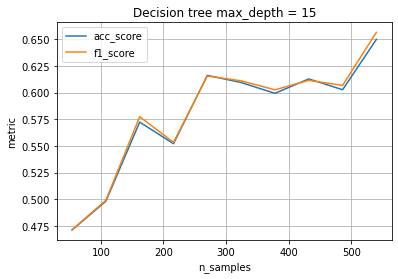

In [109]:
plt.plot(n_samples, test_acc)
plt.plot(n_samples, test_f1_score)
plt.xlabel("n_samples")
plt.ylabel("metric")
plt.legend(["acc_score", "f1_score"], loc="upper left")
plt.title("Decision tree max_depth = 15")
plt.grid()
plt.show()

In [99]:
# YOUR CODE HERE
test_acc = []
test_f1_score = []
coef = 54 # размер 1 части
n_samples = [coef*i for i in range(1,11)]


ind = np.random.permutation(len(X_train))
rfc = RandomForestClassifier(n_estimators=60, random_state=42, n_jobs=-1, oob_score=True)

for i in range(0, 10):
    if i < 9:
        samples_id = ind[:(i+1)*coef]
    else:
        samples_id = ind
    rfc.fit(X_train_scaled[samples_id], y_train[samples_id])
    y_pred = rfc.predict(X_test_scaled)
    test_acc.append(accuracy_score(y_test, y_pred))
    test_f1_score.append(f1_score(y_test, y_pred, average='weighted'))

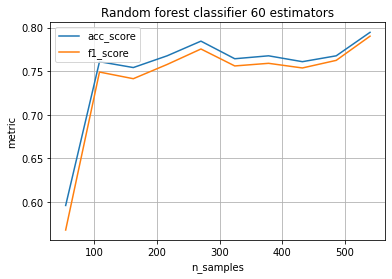

In [100]:
plt.plot(n_samples, test_acc)
plt.plot(n_samples, test_f1_score)
plt.xlabel("n_samples")
plt.ylabel("metric")
plt.legend(["acc_score", "f1_score"], loc="upper left")
plt.title("Random forest classifier 60 estimators")
plt.grid()
plt.show()

Вывод: c увеличением размера тренировочной выборки качество классификации улучшается. Есть немонотонные участки графиков за счет возможной несбалансированности классов в частях датасета после перемешивания индексов, применения pca к датасетам маленького размера(при небольшом кол-ве частей) и наличия рандома в самих алгоритмах.